<a href="https://colab.research.google.com/github/almedida/thesis/blob/main/10k_student_ttest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('pacman')
library(pacman, devtools)
p_load("tidyverse", "matrixTests", "gtools", "VennDiagram")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘matrixStats’



matrixTests installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


gtools installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘formatR’, ‘lambda.r’, ‘futile.options’, ‘futile.logger’



VennDiagram installed



##**Load Dataset**##

Load 10,000 selected genes with randomly selected samples in each group

In [2]:
tenk_group1_data = read.table("10k_untreated_group1_sorted.csv", header= TRUE, sep=",")
tenk_group2_data = read.table("10k_treated_group2_sorted.csv", header= TRUE, sep=",")

In [3]:
head(tenk_group1_data)
head(tenk_group2_data)

,X,GSM1247270,GSM1247369,GSM1247331,GSM1247364
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,5.817677,6.514915,5.388687,5.782911
2,4,8.853257,8.704396,9.377953,8.732246
3,7,7.013458,7.076799,6.805468,7.029274
4,8,7.360748,7.008969,7.180487,7.098370
5,9,7.324947,7.345208,7.249547,7.282897
6,14,6.301717,5.763372,6.041736,6.394681


,X,GSM1247245,GSM1247216,GSM1247412,GSM1247389
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,7.294158,6.906492,6.250236,6.638433
2,4,10.633180,10.581575,10.010287,10.712774
3,7,7.224860,7.496177,7.548582,6.992288
4,8,6.953448,7.119632,7.192184,6.960319
5,9,7.142798,7.181086,7.268388,7.156984
6,14,5.832879,5.611746,6.014682,5.731933


In [4]:
tenk_group1_data = tenk_group1_data[-1]
tenk_group2_data = tenk_group2_data[-1]

In [5]:
head(tenk_group1_data)
head(tenk_group2_data)

,GSM1247270,GSM1247369,GSM1247331,GSM1247364
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.817677,6.514915,5.388687,5.782911
2,8.853257,8.704396,9.377953,8.732246
3,7.013458,7.076799,6.805468,7.029274
4,7.360748,7.008969,7.180487,7.098370
5,7.324947,7.345208,7.249547,7.282897
6,6.301717,5.763372,6.041736,6.394681


,GSM1247245,GSM1247216,GSM1247412,GSM1247389
,<dbl>,<dbl>,<dbl>,<dbl>
1,7.294158,6.906492,6.250236,6.638433
2,10.633180,10.581575,10.010287,10.712774
3,7.224860,7.496177,7.548582,6.992288
4,6.953448,7.119632,7.192184,6.960319
5,7.142798,7.181086,7.268388,7.156984
6,5.832879,5.611746,6.014682,5.731933


##**Extracting p-values using Student's t-test**##

In [6]:
tenk_ttest <- row_t_equalvar(tenk_group1_data, tenk_group2_data, alternative = "two.sided", mu = 0, conf.level = 0.95)

In [7]:
head(tenk_ttest)

,obs.x,obs.y,obs.tot,mean.x,mean.y,mean.diff,var.x,var.y,var.pooled,stderr,df,statistic,pvalue,conf.low,conf.high,alternative,mean.null,conf.level
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,4,4,8,5.876048,6.772330,-0.8962822,0.219251154,0.193604818,0.206427986,0.32126935,6,-2.789816,0.0315852063,-1.68240002,-0.1101645,two.sided,0,0.95
2,4,4,8,8.916963,10.484454,-1.5674914,0.098625133,0.102838727,0.100731930,0.22442363,6,-6.984520,0.0004285995,-2.11663622,-1.0183465,two.sided,0,0.95
3,4,4,8,6.981250,7.315477,-0.3342269,0.014457528,0.066551000,0.040504264,0.14230999,6,-2.348584,0.0571690227,-0.68244688,0.0139931,two.sided,0,0.95
4,4,4,8,7.162143,7.056396,0.1057477,0.022436573,0.014088751,0.018262662,0.09555800,6,1.106634,0.3108358438,-0.12807425,0.3395697,two.sided,0,0.95
5,4,4,8,7.300650,7.187314,0.1133358,0.001834148,0.003171122,0.002502635,0.03537397,6,3.203931,0.0185080692,0.02677877,0.1998927,two.sided,0,0.95
6,4,4,8,6.125376,5.797810,0.3275665,0.080554626,0.029074297,0.054814461,0.16555129,6,1.978641,0.0952031468,-0.07752292,0.7326559,two.sided,0,0.95


In [8]:
write.csv(tenk_ttest, "pvalue_10k_sorted_all.csv", row.names=FALSE)

In [9]:
pvalue_10k_sorted <- tenk_ttest[13]
head(pvalue_10k_sorted)
write.csv(pvalue_10k_sorted, "pvalue_10k_sorted.csv", row.names=FALSE)



,pvalue
,<dbl>
1,0.0315852063
2,0.0004285995
3,0.0571690227
4,0.3108358438
5,0.0185080692
6,0.0952031468


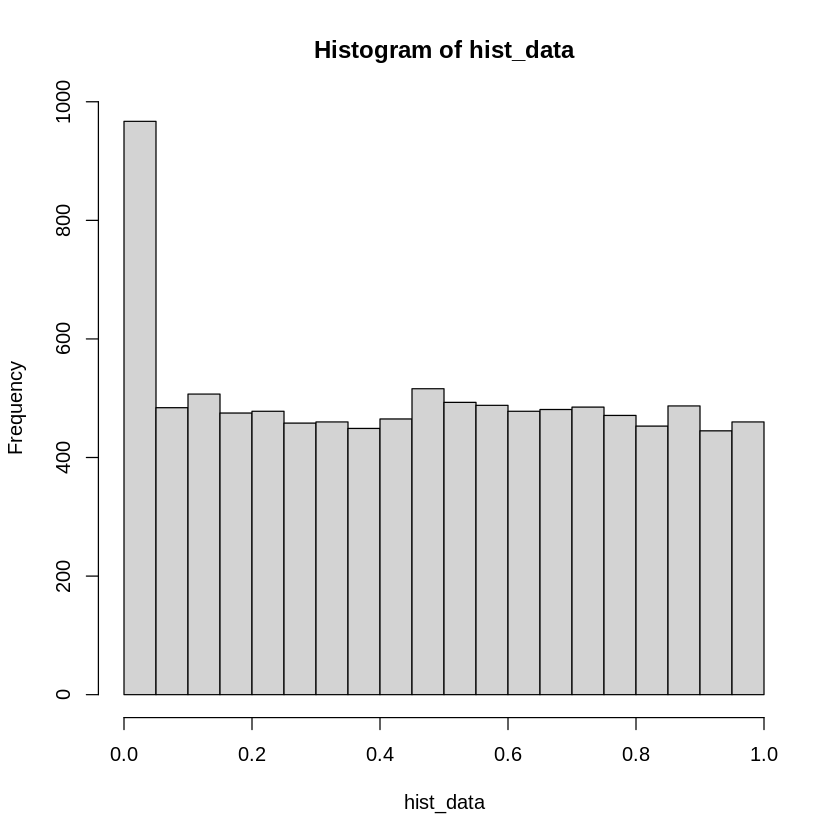

In [15]:
hist_data <- data.matrix(pvalue_10k_sorted)
hist(hist_data)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2091  0.4758  0.4738  0.7292  0.9999 

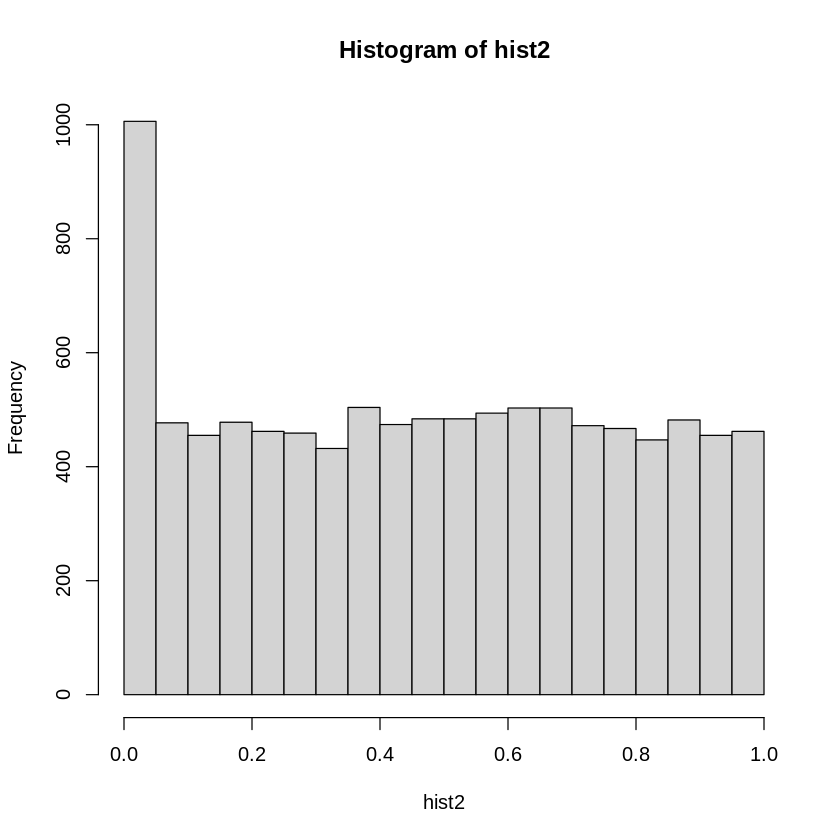

In [29]:
hist(hist2)
summary(hist_limma[, 2])

,pvalue,limma_pvalue
,<dbl>,<dbl>
1,0.031585206,3.62e-09
2,0.000428599,7.23e-07
3,0.057169023,1.16e-06
4,0.310835844,1.38e-06
5,0.018508069,1.49e-06
6,0.095203147,1.55e-06


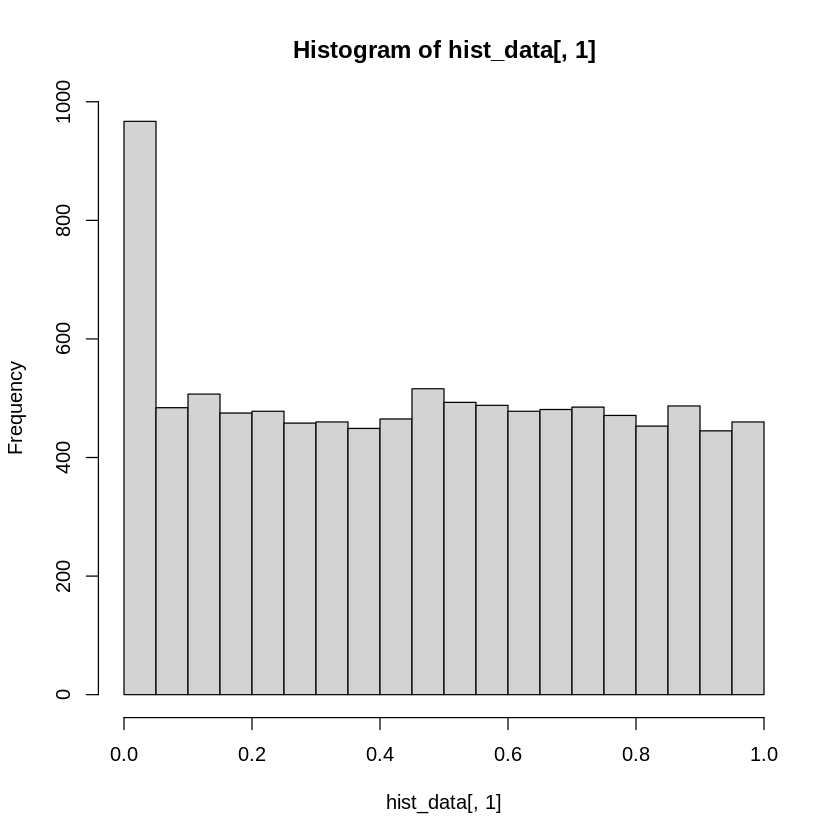

In [25]:
hist_limma = read.table("ttest_limma_pvalue_10k_sorted.csv", header= TRUE, sep=",")

head(hist_limma)
hist_data <- data.matrix(pvalue_10k_sorted)

hist(hist_data[, 1])


In [28]:
hist2 <- hist_limma[, 2]
head(hist2)

[1] 3.62e-09 7.23e-07 1.16e-06 1.38e-06 1.49e-06 1.55e-06

**Adjusted p-values using Benjamini Hochberg**

In [10]:
adj_pvalue_10k_sorted <- data.matrix(as.data.frame(as.matrix(pvalue_10k_sorted)), rownames.force = NA)


In [11]:
adj_pvalue_10k_sorted <-p.adjust(adj_pvalue_10k_sorted, "BH")

In [12]:
adj_pvalue_10k_sorted_df = data.frame(adj_pvalue_10k_sorted)
head(adj_pvalue_10k_sorted_df)
write.csv(adj_pvalue_10k_sorted_df, "adj_pvalue_10k_sorted.csv", row.names=FALSE)

,adj_pvalue_10k_sorted
,<dbl>
1,0.41791505
2,0.06055271
3,0.54411081
4,0.89498523
5,0.31433861
6,0.67625227


##**Venn Diagram Analysis using Intersection method**##

In [13]:
data0_01 = read.table("data0_01.csv", header= TRUE, sep=",")
data0_05 = read.table("data0_05.csv", header= TRUE, sep=",")
data0_1 = read.table("data0_1.csv", header= TRUE, sep=",")

Warning message in file(file, "rt"):
“cannot open file 'data0_01.csv': No such file or directory”


ERROR: ignored

In [ ]:
dataKidney0_01 = sum(data0_01[1])
dataLiver0_01 = sum(data0_01[2])
dataIntersection0_01 = sum(data0_01[3])

dataKidney0_05 = sum(data0_05[1])
dataLiver0_05 = sum(data0_05[2])
dataIntersection0_05 = sum(data0_05[3])

dataKidney0_1 = sum(data0_1[1])
dataLiver0_1 = sum(data0_1[2])
dataIntersection0_1 = sum(data0_1[3])

In [ ]:
c(dataKidney0_01, dataLiver0_01, dataIntersection0_01)


In [ ]:
draw.pairwise.venn(area1=dataKidney0_01, area2=dataLiver0_01,cross.area=dataIntersection0_01,
                   category=c("Kidney","Liver"),fill=c("Red","Yellow"),
                   )

In [ ]:
draw.pairwise.venn(area1=dataKidney0_05, area2=dataLiver0_05,cross.area=dataIntersection0_05,
                   category=c("Kidney","Liver"),fill=c("Red","Yellow"),
                   )

In [ ]:
draw.pairwise.venn(area1=dataKidney0_1, area2=dataLiver0_1,cross.area=dataIntersection0_1,
                   category=c("Kidney","Liver"),fill=c("Red","Yellow"),
                   )